In [7]:
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

<ipython-input-7-6b5e9f384420>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


In [8]:
import keras
import tensorflow as tf
from keras.layers import Input, Conv2D, MaxPool2D, Dense, Flatten
from keras.layers import concatenate, GlobalAvgPool2D,Dropout
from keras.models import Model

import keras.backend as K

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot


DECLARING LABELS

In [9]:
labels_diction ={
    'No_disease' :0,
    'Resistant': 1,
    'Moderately_resistant': 2,
    'Mod_Resistant_&_Mod_Suspectible':3,
    'Moderately_Suspectible':4,
    'Suspectible':5,
}

**PREPARING TRAINING AND TEST DATASETS**

In [ ]:
X = []
y = []
os.chdir('/content/drive/MyDrive/YellowRustDataset/No_Disease')
for i in os.listdir():
    img = cv2.imread(i)
    img = cv2.resize(img,(227,227))
    X.append(img)
    y.append(0)
os.chdir('/content/drive/MyDrive/YellowRustDataset/Resistant')
for i in os.listdir():
    img = cv2.imread(i)
    img = cv2.resize(img,(227,227))
    X.append(img)
    y.append(1)
os.chdir('/content/drive/MyDrive/YellowRustDataset/Moderately_Resistant')
for i in os.listdir():
    img = cv2.imread(i)
    img = cv2.resize(img,(227,227))
    X.append(img)
    y.append(2)
os.chdir('/content/drive/MyDrive/YellowRustDataset/Moderately_Resistant_and_Moderately_suspectible')
for i in os.listdir():
    img = cv2.imread(i)
    img = cv2.resize(img,(227,227))
    X.append(img)
    y.append(3)
os.chdir('/content/drive/MyDrive/YellowRustDataset/Moderately_Suspectible')
for i in os.listdir():
    img = cv2.imread(i)
    img = cv2.resize(img,(227,227))
    X.append(img)
    y.append(4)
os.chdir('/content/drive/MyDrive/YellowRustDataset/Suspectible')
for i in os.listdir():
    img = cv2.imread(i)
    img = cv2.resize(img,(227,227))
    X.append(img)
    y.append(5)

print(X)
print(y)

[array([[[35, 35, 35],
        [35, 35, 35],
        [42, 40, 40],
        ...,
        [21, 26, 27],
        [23, 28, 29],
        [21, 26, 27]],

       [[34, 34, 34],
        [35, 35, 35],
        [42, 40, 40],
        ...,
        [21, 25, 26],
        [23, 27, 28],
        [21, 25, 26]],

       [[33, 33, 33],
        [35, 35, 35],
        [42, 40, 40],
        ...,
        [22, 25, 26],
        [23, 26, 27],
        [21, 24, 25]],

       ...,

       [[33, 31, 31],
        [40, 38, 38],
        [42, 39, 39],
        ...,
        [38, 34, 35],
        [36, 30, 31],
        [36, 28, 29]],

       [[33, 31, 31],
        [40, 38, 38],
        [42, 40, 40],
        ...,
        [37, 35, 35],
        [36, 30, 31],
        [35, 28, 29]],

       [[33, 31, 31],
        [40, 38, 38],
        [42, 40, 40],
        ...,
        [37, 35, 35],
        [36, 30, 31],
        [35, 28, 29]]], dtype=uint8), array([[[ 73,  70,  72],
        [ 83,  80,  82],
        [100,  97,  99],
        ...,
  

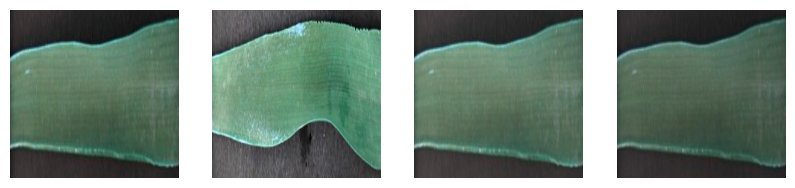

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(X[i],cmap="gray")
    plt.axis('off')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)#random state defines the shuffling process
for i in X_train:
  print(i.shape)
for i in X_test:
  print(i.shape)

(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 

In [ ]:
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (1608, 227, 227, 3)
X_test Shape:  (792, 227, 227, 3)
y_train Shape:  (1608,)
y_test Shape:  (792,)


In [ ]:
x_train_scaled = X_train / 255
x_test_scaled = X_test / 255

**ALEXNET** **MODEL**

In [ ]:
from zipfile import ZipFile
import os,glob
import cv2
import tensorflow as tf
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout, Activation, MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
def alexnet(input_shape, n_classes):
  input = Input(input_shape)

  # actually batch normalization didn't exist back then
  # they used LRN (Local Response Normalization) for regularization
  x = Conv2D(96, 11, strides=4, padding='same', activation='relu')(input)
  x = BatchNormalization()(x)
  x = MaxPool2D(3, strides=2)(x)

  x = Conv2D(256, 5, padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = MaxPool2D(3, strides=2)(x)

  x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)

  x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)

  x = Conv2D(256, 3, strides=1, padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = MaxPool2D(3, strides=2)(x)

  x = Flatten()(x)
  x = Dense(4096, activation='relu')(x)
  x = Dense(4096, activation='relu')(x)

  output = Dense(n_classes, activation='softmax')(x)

  model = Model(input, output)
  return model

In [ ]:
 input_shape = 227,227,3
 n_classes = 6
 K.clear_session()
 model = alexnet(input_shape,n_classes)
 model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 57, 57, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 57, 57, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 256)      1024  

In [ ]:
from tensorflow import keras
#Compiling the model (Adding optimizer and evaluating the metrics)
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=["accuracy"])

In [ ]:
history = model.fit(x_train_scaled,y_train,validation_data=(X_test,y_test),verbose=1,epochs=75)

Epoch 1/75
51/51 [==============================] - 10s 93ms/step - loss: 7.9719 - accuracy: 0.3060 - val_loss: 122.4274 - val_accuracy: 0.1742
Epoch 2/75
51/51 [==============================] - 3s 61ms/step - loss: 1.3444 - accuracy: 0.4173 - val_loss: 157.7558 - val_accuracy: 0.1692
Epoch 3/75
51/51 [==============================] - 3s 66ms/step - loss: 1.2498 - accuracy: 0.4509 - val_loss: 170.5776 - val_accuracy: 0.1768
Epoch 4/75
51/51 [==============================] - 3s 66ms/step - loss: 1.1386 - accuracy: 0.5056 - val_loss: 364.9341 - val_accuracy: 0.1692
Epoch 5/75
51/51 [==============================] - 4s 69ms/step - loss: 1.0925 - accuracy: 0.5143 - val_loss: 300.1307 - val_accuracy: 0.1793
Epoch 6/75
51/51 [==============================] - 3s 61ms/step - loss: 1.0472 - accuracy: 0.5348 - val_loss: 73.5557 - val_accuracy: 0.3523
Epoch 7/75
51/51 [==============================] - 3s 66ms/step - loss: 1.0447 - accuracy: 0.5516 - val_loss: 179.1322 - val_accuracy: 0.2222

In [4]:
#Training accuracy
accuracy = round(history.history['accuracy'],2)
print("Final trainig accuracy: ",accuracy,"%")

Final trainig accuracy:  98.13%


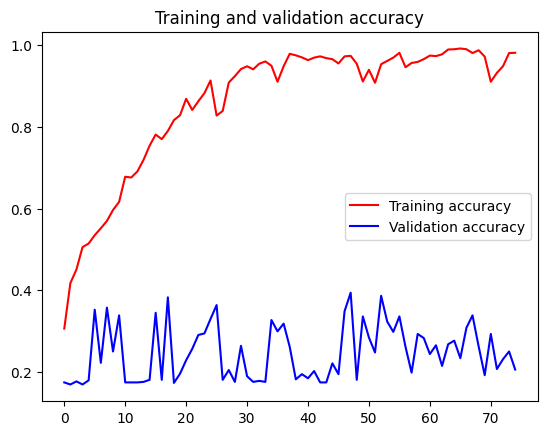

<Figure size 640x480 with 0 Axes>

In [ ]:
# history = model.fit(X_train,y_train,epochs=5, validation_data=(X_test,y_test),verbose = 1,initial_epoch=0)
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test)
print(test_accuracy)

25/25 [==============================] - 1s 25ms/step - loss: 2.4558 - accuracy: 0.6427
0.6426767706871033


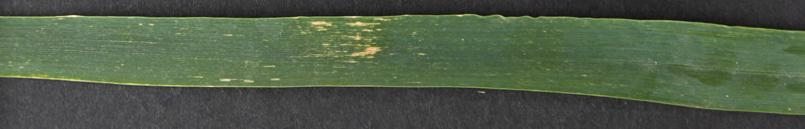

In [11]:
import PIL
image_shape=(227,227)
path='/content/drive/MyDrive/YellowRustDataset/Validation_data/Moderately_Resistant/1_R_1715.jpg'
test_image = PIL.Image.open(path)
test_image

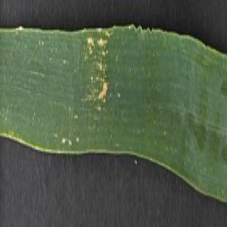

In [12]:
resized_ti = PIL.Image.open(path).resize(image_shape)
resized_ti

In [ ]:
resized_ti=np.array(resized_ti)/255.0
resized_ti.shape

(227, 227, 3)

In [ ]:
model.predict(resized_ti[np.newaxis,...])
result=model.predict(resized_ti[np.newaxis,...])
print(np.argmax(result))
value = {i for i in labels_diction if labels_diction[i]==np.argmax(result) }
print(value)

1/1 [==============================] - 0s 20ms/step
2
{'Moderately_resistant'}
